In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import pandas as pd
from torch.utils.data import Dataset, DataLoader, TensorDataset

torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
palDf = pd.read_csv('./resource/PalDataSingleElement.csv')
palDf

,1,Name,CodeName,Unnamed: 3,OverrideNameTextID,NamePrefixID,OverridePartnerSkillTextID,IsPal,Tribe,BPClass,...,WorkSuitability_Transport,WorkSuitability_MonsterFarm,PassiveSkill1,PassiveSkill2,PassiveSkill3,PassiveSkill4,IndexOrder,UniqueOnly,Image,ZukanIndexSuffix
0,2,Anubis,Anubis,NaN,NaN,NaN,NaN,True,EPalTribeID::Anubis,Anubis,...,2,0,ElementBoost_Earth_2_PAL,NaN,NaN,NaN,1,False,https://lh7-us.googleusercontent.com/sheets/AM...,NaN
1,4,Incineram Noct,Baphomet_Dark,NaN,NaN,NaN,NaN,True,EPalTribeID::Baphomet_Dark,Baphomet_Dark,...,2,0,NaN,NaN,NaN,NaN,3,True,https://lh7-us.googleusercontent.com/sheets/AM...,B
2,5,Mau,Bastet,NaN,NaN,NaN,NaN,True,EPalTribeID::Bastet,Bastet,...,0,1,NaN,NaN,NaN,NaN,4,False,https://lh7-us.googleusercontent.com/sheets/AM...,NaN
3,6,Mau Cryst,Bastet_Ice,NaN,NaN,NaN,NaN,True,EPalTribeID::Bastet_Ice,Bastet_Ice,...,0,1,NaN,NaN,NaN,NaN,5,True,https://lh7-us.googleusercontent.com/sheets/AM...,B
4,7,Rushoar,Boar,NaN,NaN,NaN,NaN,True,EPalTribeID::Boar,Boar,...,0,0,NaN,NaN,NaN,NaN,6,False,https://lh7-us.googleusercontent.com/sheets/AM...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,133,Cinnamoth,CuteButterfly,NaN,NaN,NaN,NaN,True,EPalTribeID::CuteButterfly,CuteButterfly,...,0,0,NaN,NaN,NaN,NaN,132,False,https://lh7-us.googleusercontent.com/sheets/AM...,NaN
108,136,Cremis,WoolFox,NaN,NaN,NaN,NaN,True,EPalTribeID::WoolFox,WoolFox,...,0,1,NaN,NaN,NaN,NaN,135,False,https://lh7-us.googleusercontent.com/sheets/AM...,NaN
109,137,Dumud,LazyCatfish,NaN,NaN,NaN,NaN,True,EPalTribeID::LazyCatfish,LazyCatfish,...,1,0,NaN,NaN,NaN,NaN,136,False,https://lh7-us.googleusercontent.com/sheets/AM...,NaN
110,138,Flambelle,LavaGirl,NaN,NaN,NaN,NaN,True,EPalTribeID::LavaGirl,LavaGirl,...,1,1,NaN,NaN,NaN,NaN,137,False,https://lh7-us.googleusercontent.com/sheets/AM...,NaN


In [3]:
# Join elements + hot encoded
# palDf["ElementTypes"] = palDf["ElementType1"] + "," + palDf["ElementType2"]
# palDf["ElementTypes"] = palDf["ElementTypes"].apply(lambda x: list( filter(lambda y:y != "None",  x.replace("EPalElementType::","").split(",") ) )) 
# palDf["Attack"] = ( palDf["MeleeAttack"] + palDf["ShotAttack"] ) /2
# interestedStats = ["Name", "Attack", "HP","ElementTypes"]
# palDf = palDf[interestedStats]
# palDf

In [4]:
palDf["ElementTypes"] = palDf["ElementType1"]
palDf["ElementTypes"] = palDf["ElementTypes"].apply(lambda x: x.replace("EPalElementType::","")) 
palDf["Attack"] = ( palDf["MeleeAttack"] + palDf["ShotAttack"] ) /2
interestedStats = ["Name", "Attack", "HP","ElementTypes"]
palDf = palDf[interestedStats]
palDf

,Name,Attack,HP,ElementTypes
0,Anubis,130.0,120,Earth
1,Incineram Noct,127.5,95,Dark
2,Mau,65.0,70,Dark
3,Mau Cryst,67.5,70,Ice
4,Rushoar,85.0,80,Earth
...,...,...,...,...
107,Cinnamoth,90.0,70,Leaf
108,Cremis,85.0,70,Normal
109,Dumud,85.0,100,Earth
110,Flambelle,85.0,60,Fire


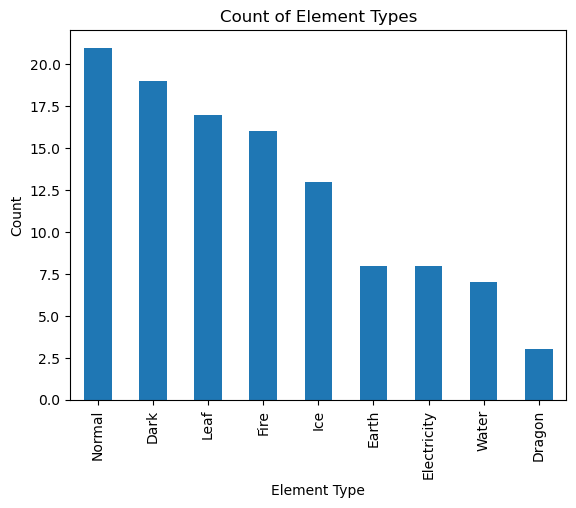

In [5]:
import matplotlib.pyplot as plt
element_counts = palDf["ElementTypes"].value_counts()
element_counts.plot(kind='bar')
plt.xlabel('Element Type')
plt.ylabel('Count')
plt.title('Count of Element Types')
plt.show()


# Attack and HP distributions

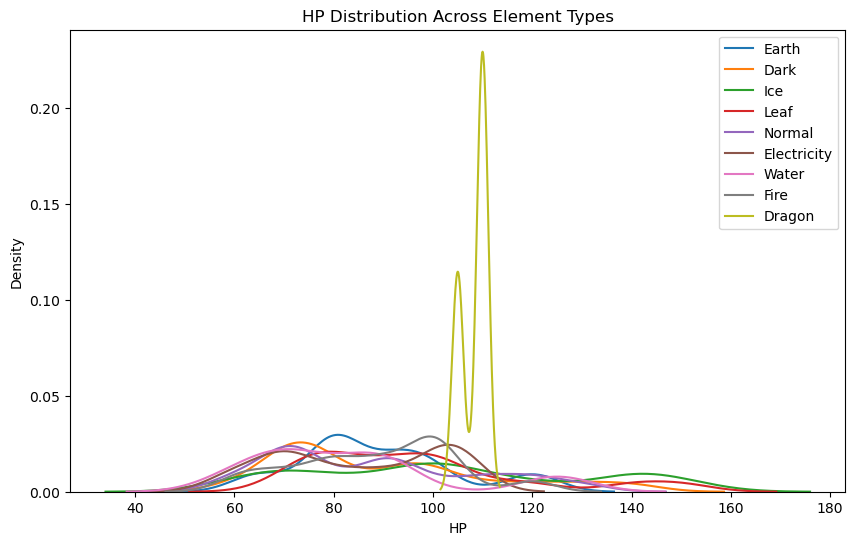

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming palDf is your DataFrame and it's already defined
unique_elements = palDf["ElementTypes"].unique()

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot a KDE for each element type
for element in unique_elements:
    subset = palDf[palDf["ElementTypes"] == element]
    sns.kdeplot(subset["HP"], label=str(element), bw_adjust=0.5)  # Adjust bandwidth as necessary

# Add legend, title, and labels
plt.legend()
plt.title('HP Distribution Across Element Types')
plt.xlabel('HP')
plt.ylabel('Density')

# Show the plot
plt.show()


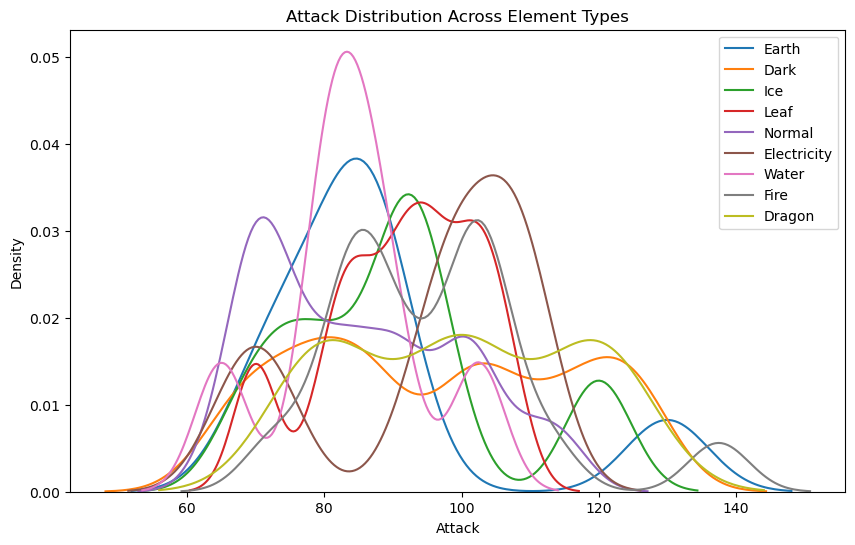

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming palDf is your DataFrame and it's already defined
unique_elements = palDf["ElementTypes"].unique()

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot a KDE for each element type
for element in unique_elements:
    subset = palDf[palDf["ElementTypes"] == element]
    sns.kdeplot(subset["Attack"], label=str(element), bw_adjust=0.5)  # Adjust bandwidth as necessary

# Add legend, title, and labels
plt.legend()
plt.title('Attack Distribution Across Element Types')
plt.xlabel('Attack')
plt.ylabel('Density')

# Show the plot
plt.show()


# Defining parameter grids

In [8]:
import numpy as np
from sklearn.model_selection import ParameterSampler,ParameterGrid
winrateSampleSize = 20
palGrid = ParameterGrid( {
    "HP":np.linspace(palDf["HP"].min(),palDf["HP"].max(), 7 ),
    "Attack":np.linspace(palDf["Attack"].min(),palDf["Attack"].max(), 7 ),
    "AGI":np.linspace( 0.05,0.7,5),
    "CRT":np.linspace( 0.05,0.7,5)
} )

In [9]:
print( len( list(palGrid) ) )

1225


In [10]:
from PalModule import Pal
from Battle import Composer
from Status import  IPalStatus,PalStatusType
from DeriveStatus import AgilityStatus,CriticalStatus
from ElementRelationTable import elementTable
from DeriveElement import FireElement,WaterElement


In [11]:
def createPal(stat,element):
    return Pal(
            "dummy1",
            [element],
            [ stat["Attack"] ],
            stat["HP"],
            avatar="dummy"
    )

def battle(combi):
    # Dummy type is water and fire
    pal1 = createPal(combi[0],"Fire")
    pal2 = createPal(combi[1],"Water")
    pal1Element = list( pal1.elements )[0]
    pal2Element = list( pal2.elements )[0]
    overrideStatus = [
        ( pal1Element,pal2Element,AgilityStatus(combi[0]["AGI"]*100) ),
        ( pal1Element,pal2Element,CriticalStatus(combi[0]["CRT"]*100) ),
        ( pal2Element,pal1Element,AgilityStatus(combi[1]["AGI"]*100) ),
        ( pal2Element,pal1Element,CriticalStatus(combi[1]["CRT"]*100) )
    ]

    elementTable.data.clear()
    for status in overrideStatus:
        elementTable.add(status[0],status[1],status[2])

    return Composer.battle(pal1,pal2,sampleSize=winrateSampleSize) / 100

# AGI aka chance of missing
# res = battle([
#     {'HP': 60.0, 'CRT': 0.95, 'Attack': 65.0, 'AGI': 0.0},
#     {'HP': 70, 'CRT': 0.00, 'Attack': 65.0, 'AGI': 0.00}
# ])
# print(res)

# Gen dummy battle data

In [12]:
battleSampler = ParameterSampler({
    "p1":list( palGrid ),
    "p2":list( palGrid )
},n_iter=50000,random_state=42)

In [13]:
import pandas as pd
battles = []
for pair in battleSampler:
    winRate = battle(list( pair.values() ))
    p1 = {key + '1': value for key, value in pair["p1"].items()}
    p2 = {key + '2': value for key, value in pair["p2"].items()}
    battles.append( {**p1, **p2, "winRate":winRate} )
battles = pd.DataFrame(battles)
battles.sample(10)

,AGI1,Attack1,CRT1,HP1,AGI2,Attack2,CRT2,HP2,winRate
11157,0.2125,125.416667,0.0500,75.0,0.5375,89.166667,0.7000,120.0,0.70
11332,0.7000,77.083333,0.7000,120.0,0.3750,101.250000,0.0500,150.0,0.00
16648,0.0500,125.416667,0.7000,60.0,0.2125,89.166667,0.2125,135.0,0.70
19128,0.2125,65.000000,0.2125,75.0,0.2125,65.000000,0.5375,90.0,0.85
29366,0.0500,137.500000,0.5375,105.0,0.5375,101.250000,0.2125,90.0,0.50
49970,0.3750,89.166667,0.2125,60.0,0.0500,89.166667,0.3750,105.0,0.85
39759,0.7000,137.500000,0.3750,60.0,0.5375,137.500000,0.3750,60.0,0.35
11564,0.3750,77.083333,0.0500,60.0,0.2125,89.166667,0.3750,90.0,0.80
11251,0.5375,101.250000,0.3750,75.0,0.5375,65.000000,0.3750,60.0,0.20
12547,0.2125,77.083333,0.2125,105.0,0.3750,137.500000,0.7000,150.0,0.70


In [14]:
from sklearn.model_selection import train_test_split
X = battles.drop(columns=["winRate"])
Y = battles["winRate"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Models Train/test

In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def evalutate(y_pred):
    print("MSE", mean_squared_error(y_test, y_pred) )
    print("MAE", mean_absolute_error(y_test, y_pred))

## Linear regression

In [16]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)
evalutate(linear_model.predict(X_test))

MSE 0.02051695774774535
MAE 0.11501749397138604


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

forest_param_grid = {
    'n_estimators': [10, 25,50,100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.linspace(2, 40, 8).astype(int),
}
forest_model = HalvingGridSearchCV(RandomForestRegressor(), forest_param_grid, cv=5, n_jobs=-1, verbose=0)
forest_model.fit(X_train, y_train)

/home/ss/.conda/envs/ML_Lab/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ss/.conda/envs/ML_Lab/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ss/.conda/envs/ML_Lab/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/ss/.conda/envs/ML_Lab/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constr

HalvingGridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                    param_grid={'max_depth': array([ 2,  7, 12, 18, 23, 29, 34, 40]),
                                'max_features': ['auto', 'sqrt', 'log2'],
                                'n_estimators': [10, 25, 50, 100, 200]})

In [18]:
print( forest_model.best_params_ )
evalutate(forest_model.predict(X_test))

{'max_depth': 40, 'max_features': 'log2', 'n_estimators': 200}
MSE 0.011481960712500001
MAE 0.08462199999999999


## Nueral network

### TODO : tinker with this after done

In [19]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(8, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid() 
        )

    def forward(self, x):
        x = self.fc(x)
        return x


# Set the random seed for reproducible results
torch.manual_seed(841)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN().to(device)
print(model)


SimpleNN(
  (fc): Sequential(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [20]:
# Assuming X and Y are your features and labels
# Loss function and optimizer
epochs = 400
lr = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Convert features and labels to tensors
X_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_tensor = torch.tensor(y_train.values, dtype=torch.float32)  # Assuming labels are in [0, 1] range

# Assuming you're using a GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create dataset and dataloader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=True)


# Move model to device
model.to(device)

# Training loop
loss_history = []
for epoch in range(epochs):
    for x, y in dataloader:
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output.squeeze(), y)  # Squeeze the output to match the shape of labels
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())        

    if (epoch+1) % 10 == 0:
        print(f'[Epoch {epoch+1}] Loss: {loss.item()}')

[Epoch 10] Loss: 0.060224659740924835
[Epoch 20] Loss: 0.05655904486775398
[Epoch 30] Loss: 0.0548800490796566
[Epoch 40] Loss: 0.05408857390284538
[Epoch 50] Loss: 0.053672514855861664
[Epoch 60] Loss: 0.053425587713718414
[Epoch 70] Loss: 0.053256385028362274
[Epoch 80] Loss: 0.05312832072377205
[Epoch 90] Loss: 0.05301154777407646
[Epoch 100] Loss: 0.05292048305273056
[Epoch 110] Loss: 0.05284852162003517
[Epoch 120] Loss: 0.05277860164642334
[Epoch 130] Loss: 0.05270126834511757
[Epoch 140] Loss: 0.05263099446892738
[Epoch 150] Loss: 0.05256316438317299
[Epoch 160] Loss: 0.05250212550163269
[Epoch 170] Loss: 0.0524386465549469
[Epoch 180] Loss: 0.052371952682733536
[Epoch 190] Loss: 0.05230460688471794
[Epoch 200] Loss: 0.05222673341631889
[Epoch 210] Loss: 0.05215461924672127
[Epoch 220] Loss: 0.05208737775683403
[Epoch 230] Loss: 0.05201940983533859
[Epoch 240] Loss: 0.05194646120071411
[Epoch 250] Loss: 0.0518668107688427
[Epoch 260] Loss: 0.05178643763065338
[Epoch 270] Loss: 0

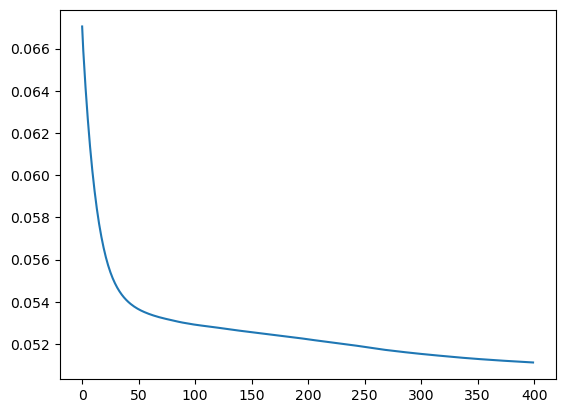

In [21]:
plt.plot(loss_history)

In [22]:
# Assuming X_test is your test data
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)

# Make predictions
with torch.no_grad():
    model.eval()
    predictions = model(X_test_tensor).squeeze().cpu().numpy()

# Evaluate the predictions
evalutate(predictions)


MSE 0.049850747911831306
MAE 0.18612099255323408


### Load up real pals

In [23]:
# Loading real pals
pals = palDf.apply(lambda row:     
        Pal(
        row["Name"],
        [ row["ElementTypes"] ],
        row["Attack"],
        row["HP"],
        f'./resource/images/{row["Name"]}.png'
    ), axis=1
)

## Parameters to optimize

In [24]:
eq = pd.read_csv('./resource/PalElementEquation.csv')
eq.set_index("index",inplace=True)
eq

,Normal,Dark,Dragon,Ice,Fire,Water,Electricity,Earth,Leaf
index,,,,,,,,,
Normal,n,<n,n,n,n,n,n,n,n
Dark,>a,a,<a,a,a,a,a,a,a
Dragon,a,>a,a,<a,a,a,a,a,a
Ice,a,a,>a,a,<a,a,a,a,a
Fire,f,f,f,>f,f,<f,f,f,>f
Water,a,a,a,a,>a,a,<a,a,a
Electricity,a,a,a,a,a,>a,a,<a,a
Earth,a,a,a,a,a,a,>a,a,<a
Leaf,a,a,a,a,<a,a,a,>a,a


In [47]:
class Parameter:
    def __init__(self, name, value,applier,constraint):
        self.name = name
        self.value = value
        self.applier = applier
        self.locations = set()
        self.constraint = constraint
    def applyValue(self):
        for row,col in self.locations:
            self.applier(row,col,self.value)
    def addLocation(self, row,col):
        self.locations.add( (row,col) )
    def forward(self, step):
        newValue = self.value + step*self.constraint['direction']
        mn,mx = sorted([self.constraint['min'],self.constraint['max']])
        if newValue >= mn and newValue <= mx:
            self.value = newValue
            self.applyValue()
    def backward(self, step):
        self.forward(-step)

class DependentParameter(Parameter):
    def __init__(self, name, value,applier,constraint,reference,margin=0,positiveRelation=True):
        super().__init__(name, value,applier,constraint)
        self.reference = reference
        self.margin = margin
        self.positiveRelation = positiveRelation
    def islegal(self):
        if self.positiveRelation:
            return self.value > self.reference.value + self.margin
        else:
            return self.value < self.reference.value - self.margin

# Search with rule

In [48]:
constraint = {
    "CRT": {
        "min_obvious_advantage":0.15,    #[0.3, 1]
        "direction":1,
        "min":0.05,
        "max":0.75
    },
    "AGI":{
        "min_obvious_advantage":0.15,   #[0, 0.7]
        "direction":-1,
        "min":0.75,
        "max":0.05
    }
}

In [49]:
crtState = eq.T.applymap(lambda x:0).to_dict()
agiState = eq.T.applymap(lambda x:0).to_dict()

/tmp/ipykernel_1364059/992918126.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  crtState = eq.T.applymap(lambda x:0).to_dict()
/tmp/ipykernel_1364059/992918126.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  agiState = eq.T.applymap(lambda x:0).to_dict()


In [50]:
from itertools import combinations
from collections import defaultdict
def defaultdict_list():
    return defaultdict(list)

def generateBattles(agiTable, crtTable):
    battles = []
    battleElements = []
    for pal1 in pals:
        e1 = pal1.elements_name[0]
        for pal2 in pals:
            e2 = pal2.elements_name[0]
            battles.append({
                "AGI1": agiTable[e1][e2],
                "Attack1": pal1.atk,
                "CRT1": crtTable[e1][e2],
                "HP1": pal1.mxHealth,

                "AGI2": agiTable[e2][e1],
                "Attack2": pal2.atk,
                "CRT2": crtTable[e2][e1],
                "HP2": pal2.mxHealth,
            })
            battleElements.append((e1,e2))
    # print("combinations", len(battles))
    return battles,battleElements
# AGI1	Attack1	CRT1	HP1	AGI2	Attack2	CRT2	HP2
def elementBattle(agiTable, crtTable):
    winrateTable = defaultdict(defaultdict_list)
    battle,battleElements = generateBattles(agiTable, crtTable)
    info = pd.DataFrame(battle)
    battleWinrates = forest_model.predict(info)
    for i in range(len(battleElements)):
        e1,e2 = battleElements[i]
        winRate = battleWinrates[i]
        winrateTable[e1][e2].append(winRate)
        
    return winrateTable


In [51]:
import numpy as np

def costByMeanWinrate(winrateTable: dict[str, dict[str, list[float]]], accuaryFunction):
    for element in winrateTable:
        for element2 in winrateTable[element]:
            winrateTable[element][element2] = np.mean(winrateTable[element][element2])
    # print(winrateTable)
    meanWinRates = [(np.mean(list(winrateTable[element].values())))  for element in winrateTable]
    # print(meanWinRates,np.full_like(meanWinRates, [0.5]))
    # meanWinRateForall = np.mean(meanWinRates)
    return accuaryFunction(meanWinRates, np.full_like(meanWinRates, [0.5]))


costByMeanWinrate(elementBattle(agiState,crtState),mean_absolute_error)

0.04776880147922777

In [52]:
eqState = eq.T.to_dict()
eqState

{'Normal': {'Normal': 'n',
  'Dark': '<n',
  'Dragon': 'n',
  'Ice': 'n',
  'Fire': 'n',
  'Water': 'n',
  'Electricity': 'n',
  'Earth': 'n',
  'Leaf': 'n'},
 'Dark': {'Normal': '>a',
  'Dark': 'a',
  'Dragon': '<a',
  'Ice': 'a',
  'Fire': 'a',
  'Water': 'a',
  'Electricity': 'a',
  'Earth': 'a',
  'Leaf': 'a'},
 'Dragon': {'Normal': 'a',
  'Dark': '>a',
  'Dragon': 'a',
  'Ice': '<a',
  'Fire': 'a',
  'Water': 'a',
  'Electricity': 'a',
  'Earth': 'a',
  'Leaf': 'a'},
 'Ice': {'Normal': 'a',
  'Dark': 'a',
  'Dragon': '>a',
  'Ice': 'a',
  'Fire': '<a',
  'Water': 'a',
  'Electricity': 'a',
  'Earth': 'a',
  'Leaf': 'a'},
 'Fire': {'Normal': 'f',
  'Dark': 'f',
  'Dragon': 'f',
  'Ice': '>f',
  'Fire': 'f',
  'Water': '<f',
  'Electricity': 'f',
  'Earth': 'f',
  'Leaf': '>f'},
 'Water': {'Normal': 'a',
  'Dark': 'a',
  'Dragon': 'a',
  'Ice': 'a',
  'Fire': '>a',
  'Water': 'a',
  'Electricity': '<a',
  'Earth': 'a',
  'Leaf': 'a'},
 'Electricity': {'Normal': 'a',
  'Dark': 'a',
 

In [53]:
def setAgi(row,col,x):
    agiState[row][col] = x
def setCrt(row,col,x):
    crtState[row][col] = x

def getVariables(cellSetter,targetConstraint):
    parameters = dict()
    for attaker in eqState.keys():
        for defender in eqState[attaker].keys():
            variable = eqState[attaker][defender]
            if variable[0] in ["<" , ">"]:
                continue
            if variable[0] not in parameters :
                parameters[variable[0]] = Parameter(
                    variable[0],
                    targetConstraint["min"],
                    cellSetter,targetConstraint)
            parameters[variable[0]].addLocation(attaker,defender)

    for attaker in eqState.keys():
        for defender in eqState[attaker].keys():
            variable = eqState[attaker][defender]
            if variable[0] in ["<" , ">"]:
                pname = attaker+variable[0]+defender
                parameters[pname] = DependentParameter(
                    pname,
                    targetConstraint["min"],
                    cellSetter,targetConstraint,
                    parameters[variable[1]],
                    targetConstraint["min_obvious_advantage"],
                    variable[0] == ">"
                )
                parameters[pname].addLocation(attaker,defender)
    return parameters
agiVariables = getVariables(setAgi,constraint["AGI"])
crtVariables = getVariables(setCrt,constraint["CRT"])
allVariables = list( agiVariables.values() )+list( crtVariables.values() )

In [54]:
# INITIAL
for v in allVariables:
    v.applyValue()
print(agiState)
print(crtState)

{'Normal': {'Normal': 0.75, 'Dark': 0.75, 'Dragon': 0.75, 'Ice': 0.75, 'Fire': 0.75, 'Water': 0.75, 'Electricity': 0.75, 'Earth': 0.75, 'Leaf': 0.75}, 'Dark': {'Normal': 0.75, 'Dark': 0.75, 'Dragon': 0.75, 'Ice': 0.75, 'Fire': 0.75, 'Water': 0.75, 'Electricity': 0.75, 'Earth': 0.75, 'Leaf': 0.75}, 'Dragon': {'Normal': 0.75, 'Dark': 0.75, 'Dragon': 0.75, 'Ice': 0.75, 'Fire': 0.75, 'Water': 0.75, 'Electricity': 0.75, 'Earth': 0.75, 'Leaf': 0.75}, 'Ice': {'Normal': 0.75, 'Dark': 0.75, 'Dragon': 0.75, 'Ice': 0.75, 'Fire': 0.75, 'Water': 0.75, 'Electricity': 0.75, 'Earth': 0.75, 'Leaf': 0.75}, 'Fire': {'Normal': 0.75, 'Dark': 0.75, 'Dragon': 0.75, 'Ice': 0.75, 'Fire': 0.75, 'Water': 0.75, 'Electricity': 0.75, 'Earth': 0.75, 'Leaf': 0.75}, 'Water': {'Normal': 0.75, 'Dark': 0.75, 'Dragon': 0.75, 'Ice': 0.75, 'Fire': 0.75, 'Water': 0.75, 'Electricity': 0.75, 'Earth': 0.75, 'Leaf': 0.75}, 'Electricity': {'Normal': 0.75, 'Dark': 0.75, 'Dragon': 0.75, 'Ice': 0.75, 'Fire': 0.75, 'Water': 0.75, 'El

In [55]:
bounds = [( sorted(  [ var.constraint['min'],var.constraint['max'] ] ) ) for var in allVariables ]

In [96]:
from skopt import gp_minimize

def objective_function(paramValues):
    for i in range(len(paramValues)):
        allVariables[i].value = paramValues[i]
        allVariables[i].applyValue()
    cost =  costByMeanWinrate(elementBattle(agiState,crtState),mean_absolute_error)
    print(cost)
    return cost

result = gp_minimize(objective_function,                  
                      bounds,               
                      acq_func="EI",        
                      n_calls=400,          
                      n_random_starts=200,  
                      random_state=123,n_jobs=-1,verbose=True)


/home/ss/.conda/envs/ML_Lab/lib/python3.10/site-packages/skopt/space/space.py:110: UserWarning: Dimension [0.05, 0.75] was inferred to Real(low=0.05, high=0.75, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(0.05, 0.75), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/home/ss/.conda/envs/ML_Lab/lib/python3.10/site-packages/skopt/space/space.py:110: UserWarning: Dimension [0.05, 0.75] was inferred to Real(low=0.05, high=0.75, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(0.05, 0.75), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/home/ss/.conda/envs/ML_Lab/lib/python3.10/site-packages/skopt/space/space.py:110: UserWarning: Dimension [0.05, 0.75] was inferred to Real(low=0.05, high=0.75, prior='uniform', transf

Iteration No: 1 started. Evaluating function at random point.
0.0180423764494891
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.5608
Function value obtained: 0.0180
Current minimum: 0.0180
Iteration No: 2 started. Evaluating function at random point.
0.047868985521633406
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.6143
Function value obtained: 0.0479
Current minimum: 0.0180
Iteration No: 3 started. Evaluating function at random point.
0.04430325395183582
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.5907
Function value obtained: 0.0443
Current minimum: 0.0180
Iteration No: 4 started. Evaluating function at random point.
0.05891214120799736
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.5788
Function value obtained: 0.0589
Current minimum: 0.0180
Iteration No: 5 started. Evaluating function at random point.
0.04780162620739257
Iteration No: 5 ended. Evaluation done at random point.
Time taken

KeyboardInterrupt: 

In [ ]:
result.x

[0.5490687243662591,
 0.34992964833077805,
 0.5336193985188032,
 0.5534052171083412,
 0.3937832534028181,
 0.5960194333384555,
 0.3376470608963133,
 0.45578600791582713,
 0.1479655338412692,
 0.3307122896628425,
 0.4891219065363317,
 0.27690562536567875,
 0.22133149386774392,
 0.5363286240296884,
 0.4657316797718166,
 0.4922544123809353,
 0.35818002464485343,
 0.10860853919450905,
 0.5486311269721338,
 0.3495044435864737,
 0.25844634841831216,
 0.39445934375463965,
 0.5682074735143517,
 0.30041024316631526,
 0.3420469636177364,
 0.5083049152288739,
 0.31166099876004655,
 0.21415901262760034,
 0.7415967005616673,
 0.5861971651350966,
 0.5939031072228464,
 0.0695873685300643,
 0.1717345613656906,
 0.1578575692927927,
 0.1039605365587983,
 0.6729059897247398,
 0.575265093336794,
 0.5353822705217601,
 0.40823436268631874,
 0.3749876390156676,
 0.44790148497322857,
 0.2617846177674818]

## Output to program

In [91]:
for i in range(len(result.x)):
    allVariables[i].value = result.x[i]
    allVariables[i].applyValue()

In [92]:
agiStateOut = pd.DataFrame(agiState)
crtStateOut = pd.DataFrame(crtState)

In [93]:
agiStateOut

,Normal,Dark,Dragon,Ice,Fire,Water,Electricity,Earth,Leaf
Normal,0.549069,0.393783,0.349930,0.349930,0.533619,0.349930,0.349930,0.349930,0.349930
Dark,0.553405,0.349930,0.337647,0.349930,0.533619,0.349930,0.349930,0.349930,0.349930
Dragon,0.549069,0.596019,0.349930,0.147966,0.533619,0.349930,0.349930,0.349930,0.349930
Ice,0.549069,0.349930,0.455786,0.349930,0.489122,0.349930,0.349930,0.349930,0.349930
Fire,0.549069,0.349930,0.349930,0.330712,0.533619,0.536329,0.349930,0.349930,0.349504
Water,0.549069,0.349930,0.349930,0.349930,0.276906,0.349930,0.492254,0.349930,0.349930
Electricity,0.549069,0.349930,0.349930,0.349930,0.533619,0.465732,0.349930,0.108609,0.349930
Earth,0.549069,0.349930,0.349930,0.349930,0.533619,0.349930,0.358180,0.349930,0.258446
Leaf,0.549069,0.349930,0.349930,0.349930,0.221331,0.349930,0.349930,0.548631,0.349930


In [94]:
crtStateOut

,Normal,Dark,Dragon,Ice,Fire,Water,Electricity,Earth,Leaf
Normal,0.394459,0.508305,0.568207,0.568207,0.300410,0.568207,0.568207,0.568207,0.568207
Dark,0.342047,0.568207,0.214159,0.568207,0.300410,0.568207,0.568207,0.568207,0.568207
Dragon,0.394459,0.311661,0.568207,0.586197,0.300410,0.568207,0.568207,0.568207,0.568207
Ice,0.394459,0.568207,0.741597,0.568207,0.069587,0.568207,0.568207,0.568207,0.568207
Fire,0.394459,0.568207,0.568207,0.593903,0.300410,0.103961,0.568207,0.568207,0.447901
Water,0.394459,0.568207,0.568207,0.568207,0.171735,0.568207,0.575265,0.568207,0.568207
Electricity,0.394459,0.568207,0.568207,0.568207,0.300410,0.672906,0.568207,0.408234,0.568207
Earth,0.394459,0.568207,0.568207,0.568207,0.300410,0.568207,0.535382,0.568207,0.261785
Leaf,0.394459,0.568207,0.568207,0.568207,0.157858,0.568207,0.568207,0.374988,0.568207


In [ ]:
combinedDict = agiState.copy()
for e1 in combinedDict.keys():
    for e2 in combinedDict[e1].keys():
        combinedDict[e1][e2] = "AGI : {}%\nCRT : {}".format(agiState[e1][e2],crtState[e1][e2])

In [85]:
combinedDict

{'Normal': {'Normal': 'AGI : 1.3361473023268258%\nCRT : 0.6596942149958985',
  'Dark': 'AGI : 0.5030600314174203%\nCRT : 0.06314452171259789',
  'Dragon': 'AGI : 1.3361473023268258%\nCRT : 0.6596942149958985',
  'Ice': 'AGI : 1.3361473023268258%\nCRT : 0.6596942149958985',
  'Fire': 'AGI : 1.3361473023268258%\nCRT : 0.6596942149958985',
  'Water': 'AGI : 1.3361473023268258%\nCRT : 0.6596942149958985',
  'Electricity': 'AGI : 1.3361473023268258%\nCRT : 0.6596942149958985',
  'Earth': 'AGI : 1.3361473023268258%\nCRT : 0.6596942149958985',
  'Leaf': 'AGI : 1.3361473023268258%\nCRT : 0.6596942149958985'},
 'Dark': {'Normal': 'AGI : 0.7397369644250216%\nCRT : 0.6158602133857379',
  'Dark': 'AGI : 1.478945718800778%\nCRT : 0.74065946598035',
  'Dragon': 'AGI : 1.0822373053102006%\nCRT : 0.4307772030444535',
  'Ice': 'AGI : 1.478945718800778%\nCRT : 0.74065946598035',
  'Fire': 'AGI : 1.478945718800778%\nCRT : 0.74065946598035',
  'Water': 'AGI : 1.478945718800778%\nCRT : 0.74065946598035',
 